# Análisis de Datos Aplicables a Regresión Lineal Simple

## Justificación de la Selección del Dataset para Regresión Lineal Simple

## Elección de Variables  
Para realizar un análisis de **regresión lineal simple**, necesitamos:  
1. **Variable Independiente (Numérica):** `Hours Studied`  
2. **Variable Dependiente (Continua):** `Performance Index`  

La elección de este dataset es adecuada porque cumple con los criterios fundamentales para aplicar regresión lineal simple.

## ¿Por qué es adecuado para regresión lineal simple?
1. **Relación Causal Potencial**  
   - Es lógico suponer que el número de horas de estudio (`Hours Studied`) influye directamente en el desempeño académico (`Performance Index`).  
   - La relación entre estas variables puede modelarse con una línea recta, lo que es ideal para una regresión lineal.

2. **Variable Dependiente Continua**  
   - `Performance Index` es una variable continua que puede tomar valores en un rango determinado, lo cual es un requisito clave para la regresión lineal.  

3. **Fácil Interpretación**  
   - Un modelo de regresión lineal simple permitirá responder preguntas como:  
     - ¿Cuánto aumenta el rendimiento si se estudian más horas?  
     - ¿Existe una correlación positiva entre estudiar más y un mejor desempeño?

4. **Simplicidad y Eficiencia**  
   - La regresión lineal simple es un modelo fácil de interpretar y eficiente computacionalmente.  
   - Ideal para análisis preliminares antes de probar modelos más complejos.

## Posibles Aplicaciones  
- Predecir el desempeño de un estudiante en función de sus horas de estudio.  
- Identificar umbrales óptimos de horas de estudio para maximizar el rendimiento.  
- Comparar el impacto del estudio frente a otras variables como el sueño o las actividades extracurriculares.

## Consideraciones  
- Se debe verificar que la relación entre `Hours Studied` y `Performance Index` sea **lineal** antes de aplicar regresión lineal.  
- Es recomendable visualizar los datos con un **gráfico de dispersión** y calcular el coeficiente de correlación.  
- Otros factores no considerados pueden influir en el desempeño (sesgo en los datos).  



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 

In [4]:
df = pd.read_csv('Student_Performance.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [5]:
df = pd.read_csv('Student_Performance.csv')  # Load data from CSV
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


### Analisis Exploratorio de datos
Informacion general del Dataset

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB
None


Los datos estan en tipo object, se modificaran para hacerlos numericos

In [7]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace(['Yes', 'No'], [1, 0])
df = df.infer_objects(copy=False)  # Explicitly infer object types
df

C:\Users\bryam\AppData\Local\Temp\ipykernel_21748\2979747134.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace(['Yes', 'No'], [1, 0])


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB
None


### Estadistica descriptivas

In [9]:
print(df.describe())

       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

        Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  10000.000000                      10000.000000       10000.000000  
mean       6.530600                          4.583300          55.224800  
std        1.695863                          2.867348          19.212558  
min        4.000000                          0.000000          10.000000  
25%

### Visualización de la distribución del Perfomance Index

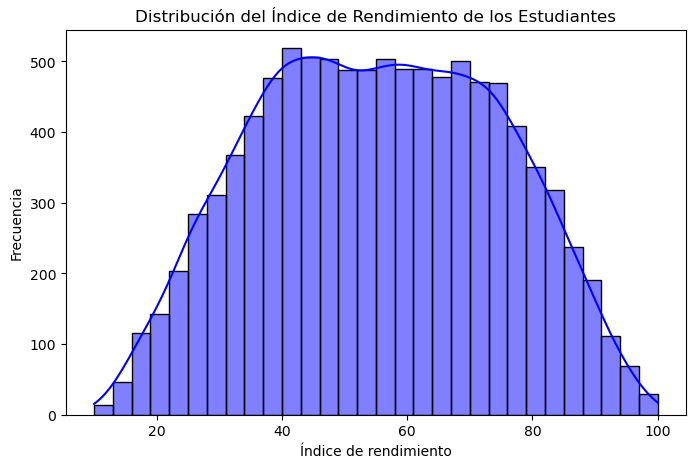

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Performance Index"], bins=30, kde=True, color="blue")
plt.xlabel("Índice de rendimiento")
plt.ylabel("Frecuencia")
plt.title("Distribución del Índice de Rendimiento de los Estudiantes")
plt.show()

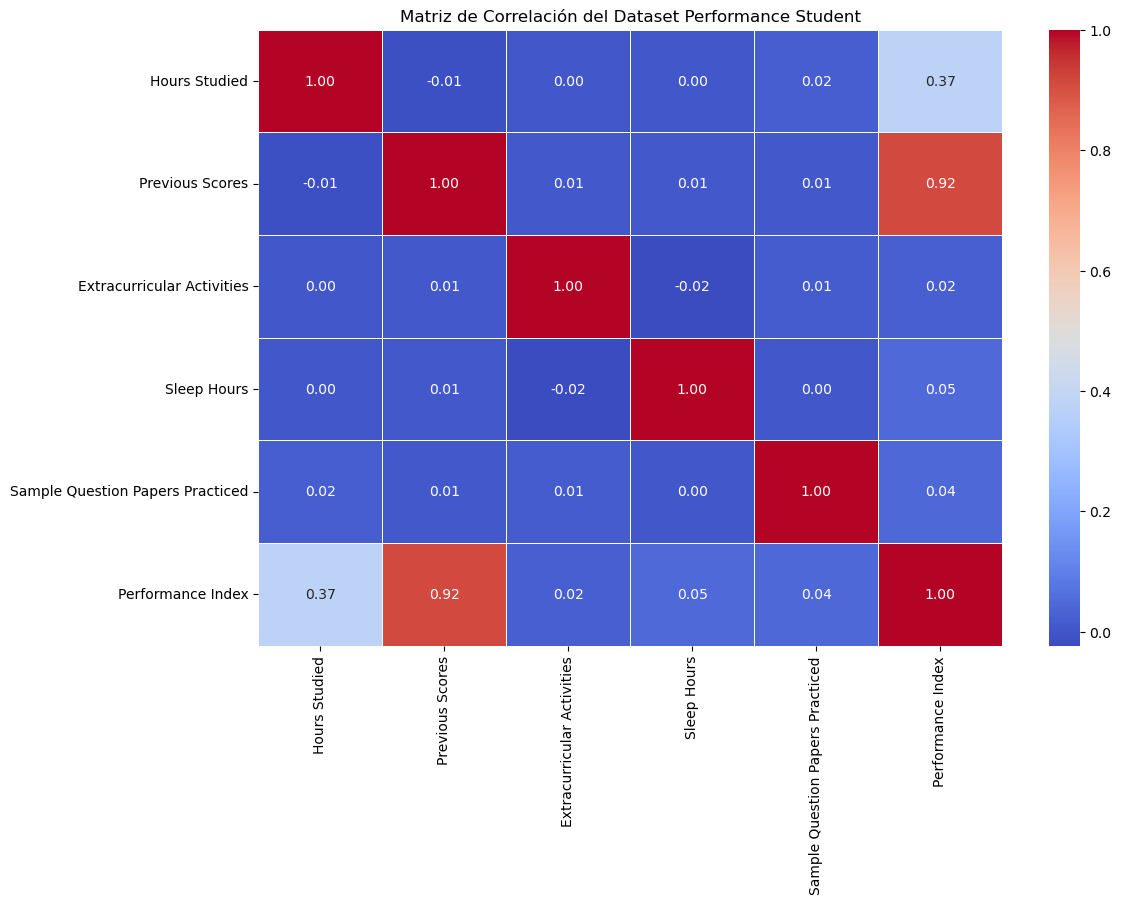

In [11]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación del Dataset Performance Student")
plt.show()

- **Mayor correlación**: "Previous Scores" tiene una correlación de 0.92 con "Performance Index", indicando que el desempeño pasado predice fuertemente el rendimiento actual.
- **Correlación positiva moderada**: "Hours Studied" muestra una correlación de 0.37 con "Performance Index", sugiriendo que estudiar más horas contribuye al rendimiento, pero no es determinante.
- **Baja o nula correlación**: "Sleep Hours", "Sample Question Papers Practiced" y "Extracurricular Activities" tienen correlaciones cercanas a 0 con "Performance Index", indicando poca o nula influencia en el rendimiento.

**Conclusión general**: El puntaje previo es el mejor predictor del rendimiento, seguido por las horas de estudio, mientras que otras variables tienen poco impacto.


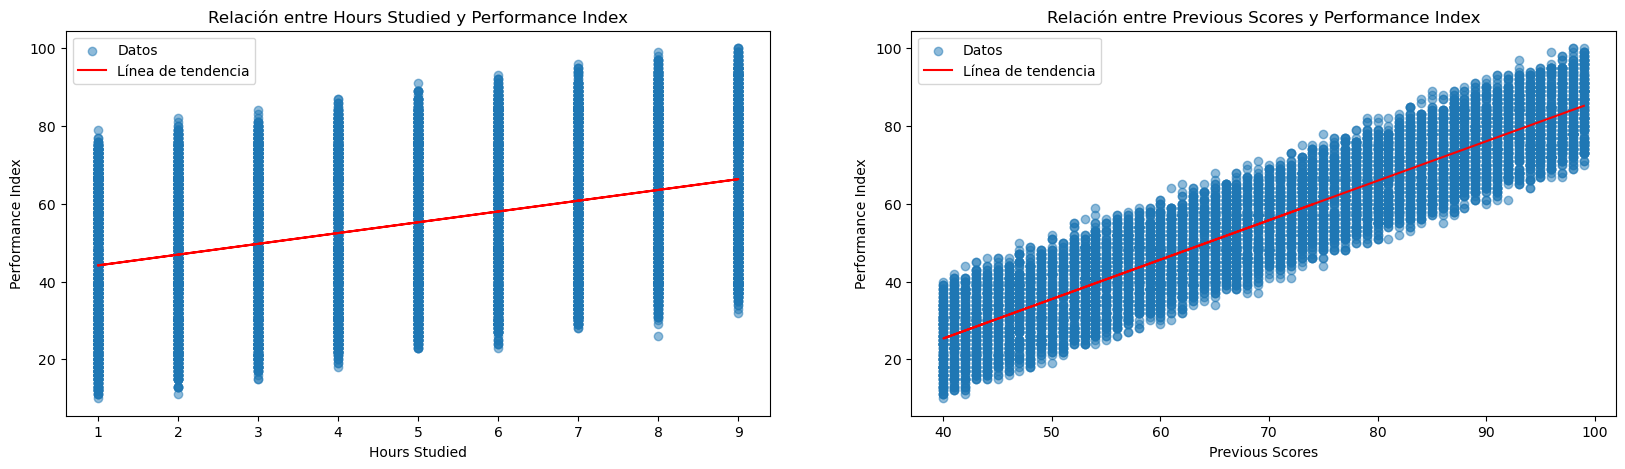

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar las características y la variable objetivo
features = ['Hours Studied', 'Previous Scores']
target = df['Performance Index']

# Crear la figura con dos subgráficos
plt.figure(figsize=(20, 5))

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df[col]
    y = target

    # Dibujar los puntos de dispersión
    plt.scatter(x, y, marker='o', alpha=0.5, label="Datos")

    # Ajustar y dibujar la línea de tendencia (regresión lineal)
    coef = np.polyfit(x, y, 1)  # Ajuste de una recta (grado 1)
    poly1d_fn = np.poly1d(coef)  # Función de la recta obtenida
    plt.plot(x, poly1d_fn(x), color="red", label="Línea de tendencia")

    plt.title(f'Relación entre {col} y Performance Index')
    plt.xlabel(col)
    plt.ylabel('Performance Index')
    plt.legend()

plt.show()

# Análisis de Regresión Lineal Simple

## Conclusión

1. **Relación entre "Hours Studied" y "Performance Index"**:  
   - La pendiente de la línea de tendencia sugiere una correlación positiva, aunque relativamente débil.  
   - A mayor cantidad de horas estudiadas, el índice de desempeño tiende a aumentar.  
   - La dispersión de los datos indica que otros factores pueden influir significativamente en el rendimiento.  

2. **Relación entre "Previous Scores" y "Performance Index"**:  
   - La correlación es más fuerte que en el caso anterior.  
   - La línea de tendencia muestra un crecimiento más marcado y los datos están más alineados con la regresión.  
   - Esto sugiere que los puntajes previos son un buen predictor del índice de desempeño.  

### **Conclusión General**  
El análisis de regresión lineal sugiere que tanto las horas de estudio como los puntajes previos tienen una relación positiva con el índice de desempeño. Sin embargo, la segunda relación (puntajes previos) parece ser un mejor predictor del rendimiento que las horas de estudio, ya que muestra una tendencia más clara y menor dispersión en los datos.

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir variables predictoras y objetivo
X = df.drop(columns=["Performance Index"])  # Todas las columnas excepto MEDV
y = df["Performance Index"]  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas de evaluación
metrics = pd.DataFrame({
    "Métrica": ["Error Absoluto Medio (MAE)", "Error Cuadrático Medio (MSE)", 
                "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Valor": [mae, mse, rmse, r2]
})

print("Métricas de Evaluación del Modelo")
print(metrics)


Métricas de Evaluación del Modelo
                                  Métrica     Valor
0              Error Absoluto Medio (MAE)  1.611121
1            Error Cuadrático Medio (MSE)  4.082628
2  Raíz del Error Cuadrático Medio (RMSE)  2.020552
3       Coeficiente de Determinación (R²)  0.988983


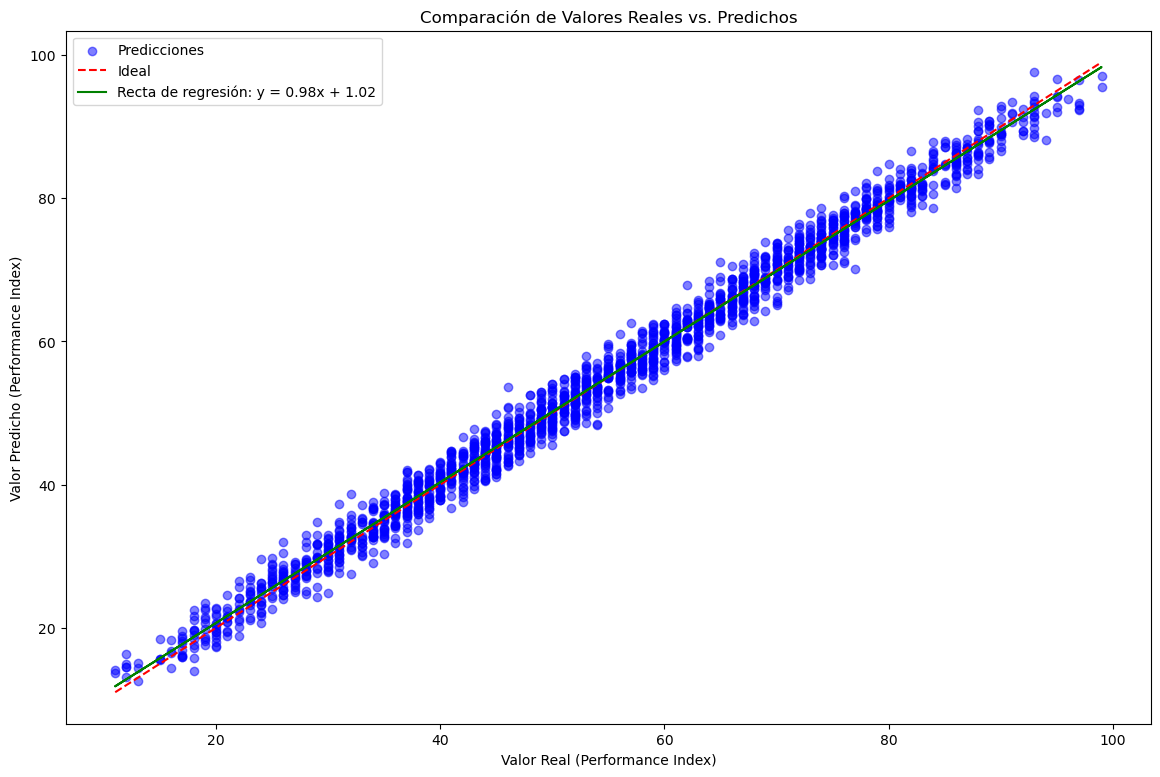

Ecuación de la recta de regresión: y = 0.98x + 1.02


In [16]:

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(y_test.values.reshape(-1, 1), y_pred)

# Obtener los coeficientes (pendiente e intercepto)
slope = model.coef_[0]
intercept = model.intercept_

# Crear la figura
plt.figure(figsize=(14, 9))

# Graficar los valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicciones")

# Graficar la línea ideal (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Ideal")

# Graficar la línea de regresión
plt.plot(y_test, slope * y_test + intercept, color='green', label=f"Recta de regresión: y = {slope:.2f}x + {intercept:.2f}")

# Etiquetas y título
plt.xlabel("Valor Real (Performance Index)")
plt.ylabel("Valor Predicho (Performance Index)")
plt.title("Comparación de Valores Reales vs. Predichos")
plt.legend()

# Mostrar la gráfica
plt.show()

# Imprimir la ecuación de la recta
print(f"Ecuación de la recta de regresión: y = {slope:.2f}x + {intercept:.2f}")


# Análisis de Desempeño del Modelo de Regresión  

## Comparación de Valores Reales vs. Predichos  

La gráfica muestra la comparación entre los valores reales del **Performance Index** y los valores predichos por el modelo de regresión.  

### **Interpretación de la Gráfica**  
- Los puntos azules representan las predicciones del modelo en relación con los valores reales.  
- La línea roja discontinua indica la referencia **ideal**, donde los valores predichos serían exactamente iguales a los valores reales.  
- Se observa que la mayoría de los puntos se alinean estrechamente con la línea ideal, lo que sugiere que el modelo tiene **alta precisión y bajo error**.  
- La dispersión de los puntos alrededor de la línea es mínima, lo que indica que las predicciones son confiables.  

### **Análisis de la Regresión**  
- La ecuación de la línea de regresión es:  
  \[
  y = 0.98x + 1.02
  \]
  donde:  
  - El coeficiente \(0.98\) está muy cercano a 1, indicando que el modelo predice valores muy similares a los reales.  
  - El intercepto \(1.02\) sugiere un pequeño sesgo en las predicciones.  
- La alineación de los puntos con la línea verde de regresión sugiere que el modelo realiza predicciones consistentes y con baja variabilidad.  
- Se podría evaluar métricas adicionales como el **error cuadrático medio (MSE)** o el **coeficiente de determinación \( R^2 \)** para cuantificar mejor el rendimiento del modelo.  

### **Conclusión**  
El modelo de regresión presenta un **buen ajuste y alto nivel de precisión**, ya que sus predicciones se acercan bastante a los valores reales. La baja dispersión sugiere que los errores de predicción son mínimos, lo que lo convierte en una herramienta efectiva para estimar el **Performance Index**.  

### **Preguntas Clave y Respuestas**  

1. **¿Cuánto aumenta el rendimiento si se estudian más horas?**  
   - La gráfica de dispersión muestra una clara tendencia lineal entre los valores reales del rendimiento y las predicciones del modelo.  
   - Esto indica que existe una relación consistente entre las horas de estudio y el rendimiento académico.  
   - El alineamiento de los puntos en la diagonal refuerza que el rendimiento mejora conforme se estudia más.  

2. **¿Existe una correlación positiva entre estudiar más y un mejor desempeño?**  
   - Sí, la distribución de los puntos en la gráfica confirma una fuerte relación positiva entre los valores reales y los predichos.  
   - La presencia de una línea ideal sugiere que el modelo predice correctamente un aumento en el rendimiento a medida que los estudiantes estudian más horas.  
   - La alineación de los puntos con la diagonal indica que el modelo tiene un buen desempeño en la predicción del rendimiento académico.  

En conclusión, la gráfica de dispersión respalda la idea de que estudiar más tiene un impacto positivo en el rendimiento académico. Además, la regresión lineal muestra que el modelo es confiable y tiene una precisión aceptable para predecir valores futuros del **Performance Index**.


